# 单例模式
## 意图
单例模式是一种创建型设计模式， 让你能够保证一个类只有一个实例， 并提供一个访问该实例的全局节点。

## 问题
单例模式同时解决了两个问题， 所以违反了单一职责原则：（修改一个类的原因只能有一个。尽量让每个类只负责软件中的一个功能，并将该功能完全封
装（你也可称之为隐藏）在该类中。）
1. 保证一个类只有一个实例。</br>

为什么会有人想要控制一个类所拥有的实例数量？ 最常见的原因是控制某些共享资源 （例如数据库或文件） 的访问权限。

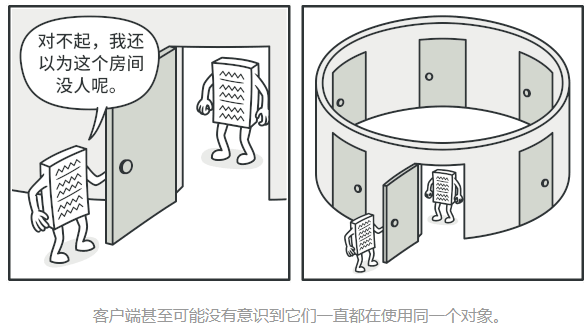

2. 为该实例提供一个全局访问节点。

和全局变量一样， 单例模式也允许在程序的任何地方访问特定对象。 但是它可以保护该实例不被其他代码覆盖。

## 解决方案

所有单例的实现都包含以下两个相同的步骤：

- 将默认构造函数设为私有， 防止其他对象使用单例类的 new运算符。
- 新建一个静态构建方法作为构造函数。 该函数会 “偷偷” 调用私有构造函数来创建对象， 并将其保存在一个静态成员变量中。 此后所有对于该函数的调用都将返回这一缓存对象。

## 单例模式结构

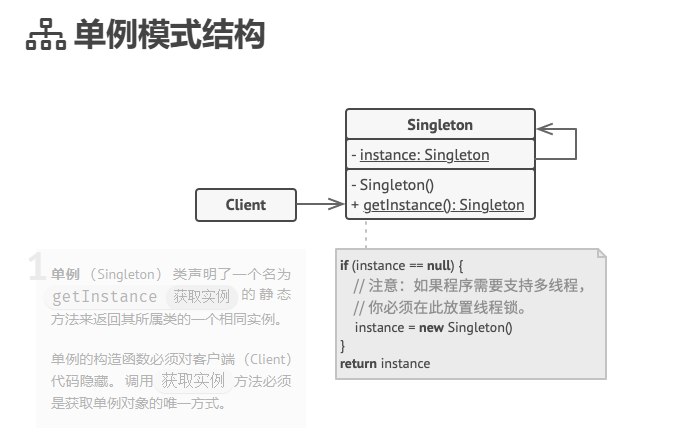

## 代码

In [2]:
%%writefile ./06dp/creational_patterns/singleton/main.py
from typing import Any


class SingletonMeta(type):
    """
    The Singleton class can be implemented in different ways in Python. Some
    possible methods include: base class, decorator, metaclass. We will use the
    metaclass because it is best suited for this purpose.
    """

    _instances = {}

    def __call__(cls, *args: Any, **kwds: Any) -> Any:
        if cls not in cls._instances:
            instance = super().__call__(*args, **kwds)
            cls._instances[cls] = instance
        return cls._instances[cls]


class Singleton(metaclass=SingletonMeta):
    def some_business_logic(self) -> Any:
        """
        Finally, any singleton should define some business logic, which can be
        executed on its instance.
        """


if __name__ == "__main__":
    # The client code.
    s1 = Singleton()
    s2 = Singleton()

    if id(s1) == id(s2):
        print("Singleton works, both variables contain the same instance.")
    else:
        print("Singleton failed, variables contain different instances.")

Writing ./06dp/creational_patterns/singleton/main.py


##  单例模式适合应用场景
如果程序中的某个类对于所有客户端只有一个可用的实例， 可以使用单例模式。

如果你需要更加严格地控制全局变量， 可以使用单例模式。

## 实现方式
1. 在类中添加一个私有静态成员变量用于保存单例实例。

2. 声明一个公有静态构建方法用于获取单例实例。

3. 在静态方法中实现"延迟初始化"。 该方法会在首次被调用时创建一个新对象， 并将其存储在静态成员变量中。 此后该方法每次被调用时都返回该实例。

4. 将类的构造函数设为私有。 类的静态方法仍能调用构造函数， 但是其他对象不能调用。

5. 检查客户端代码， 将对单例的构造函数的调用替换为对其静态构建方法的调用。

## 单例模式优缺点

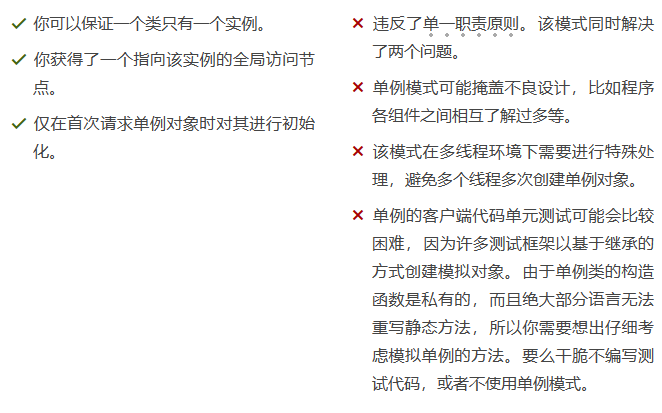

## 与其他模式的关系

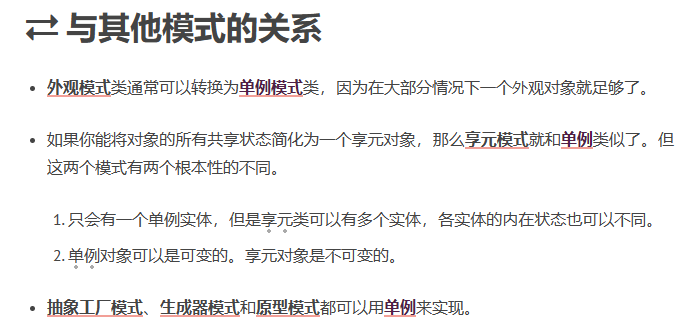